<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew.

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [2]:
# ANSWER
# Load data
df = pd.read_csv('/Users/stephanienduaguba/Documents/DATA/titanic_train.csv', index_col='PassengerId')

# Display first 5 rows
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is a unique identifier and could be used to split the dataset into training and testing data.

<a name="datadictionary"></a>
### 2. Data Dictionary

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values.

In [3]:
# Display first 5 rows
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# ANSWER
# Number of rows and columns
df.shape

(891, 11)

In [5]:
# Column headers
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Check non-null count and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Columns with 'non-null' values include: Age, Cabin and Embarked. Further analysis to be carried out to treat missing values. 

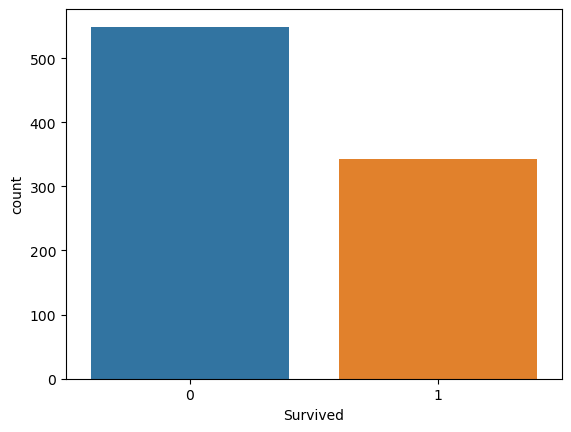

In [7]:
# Countplot of target variable
sns.countplot(data=df, x='Survived');

In [8]:
# Count of male and female survivors
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

There are more female survivors than male survivors.

In [9]:
# Add new column with an age category to understand the demographics of survivors
df['AgeRange'] = pd.cut(df['Age'], [0, 15, 80], labels=['child', 'adult'])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,adult
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


In [10]:
# Survival rate by pclass
survived_by_pclass = df.groupby('Pclass')['Survived'].mean()
survived_by_pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
# Survival rate by sex
survived_by_sex = df.groupby('Sex')['Survived'].mean()
survived_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [12]:
# Survival rate by age range
survived_by_age = df.groupby('AgeRange')['Survived'].mean()
survived_by_age

AgeRange
child    0.590361
adult    0.381933
Name: Survived, dtype: float64

(0.0, 1.0)

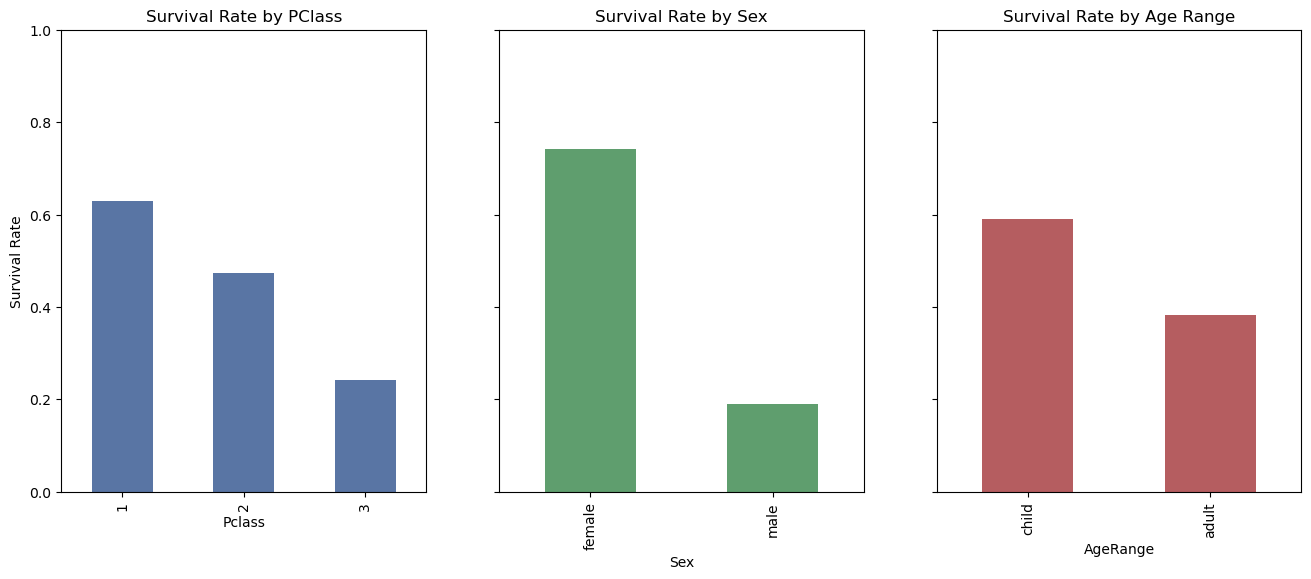

In [13]:
# Creating subplots for survival rate analysis
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(16, 6))

# Subplot 1: Survival rate by pclass
ax = survived_by_pclass.plot.bar(ax=axis1, color='#5975A4', title='Survival Rate by PClass', sharey=True)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0, 1.0)

# Subplot 2: Survival rate by sex
ax = survived_by_sex.plot.bar(ax=axis2, color='#5F9E6E', title='Survival Rate by Sex', sharey=True)
ax.set_ylim(0.0, 1.0)

# Subplot 3: Survival rate by age range
ax = survived_by_age.plot.bar(ax=axis3, color='#B55D60', title='Survival Rate by Age Range', sharey=True)
ax.set_ylim(0.0, 1.0)

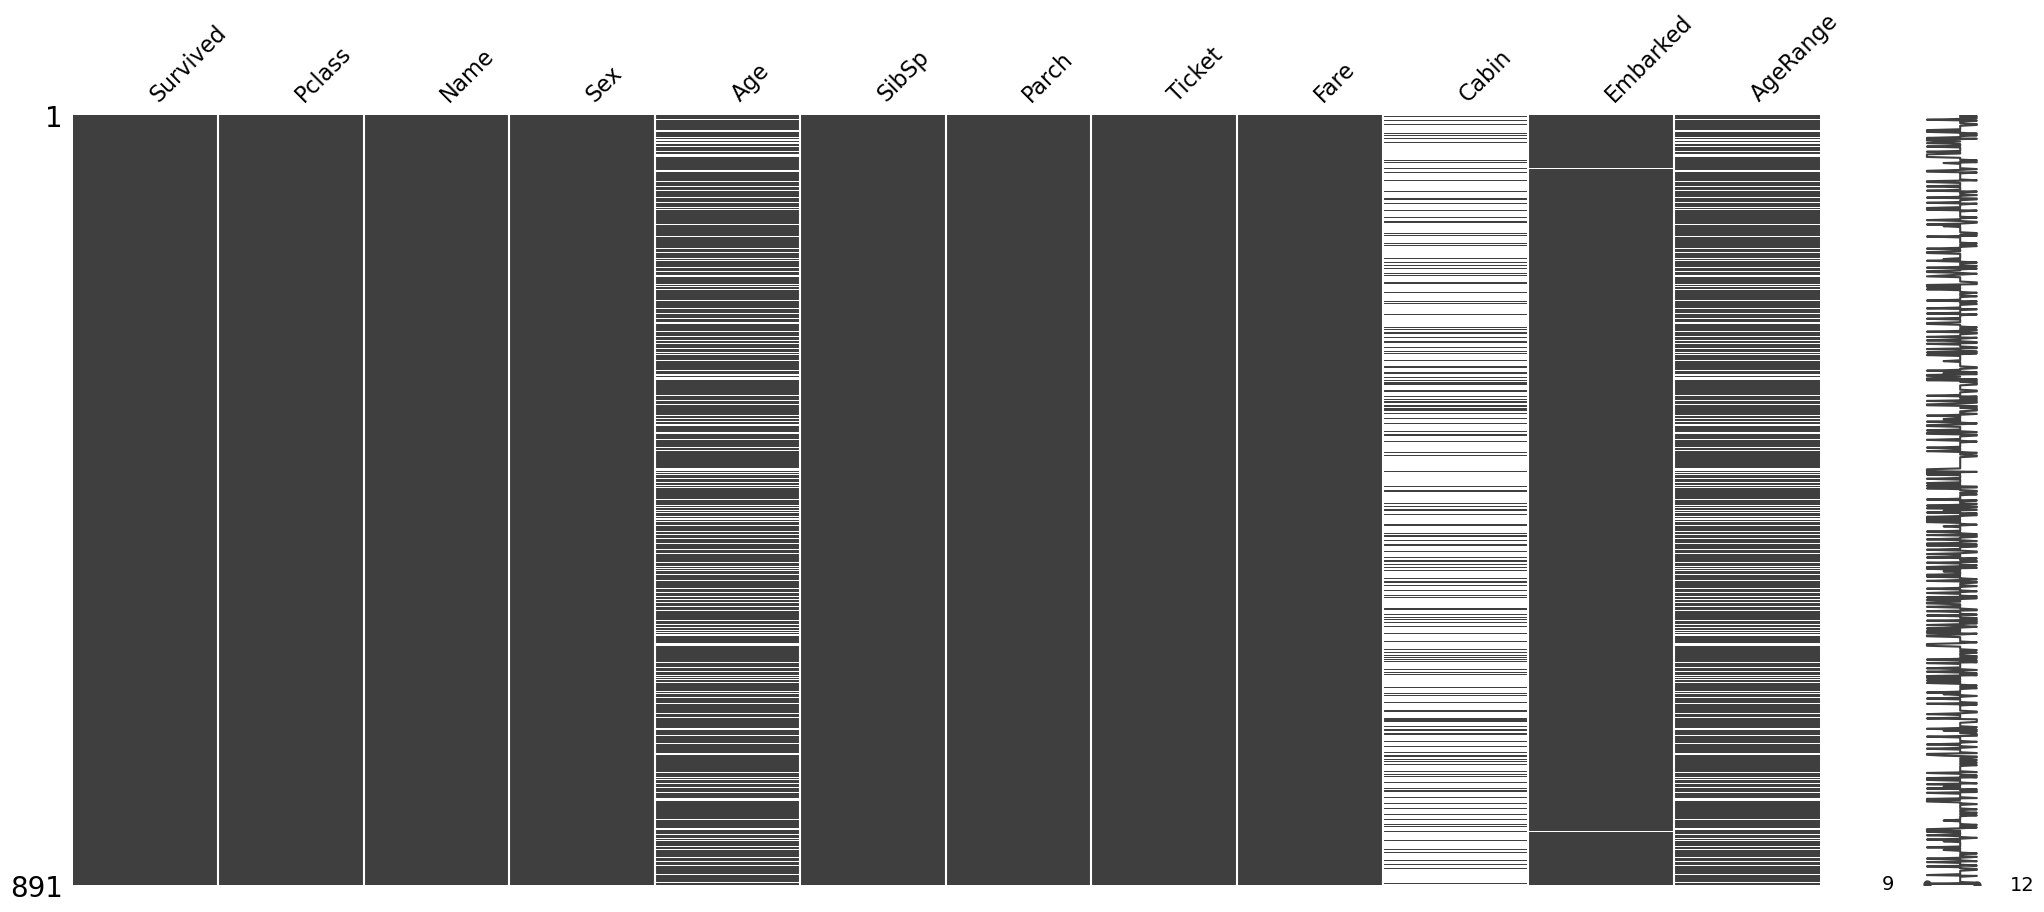

In [14]:
# Missing value matrix to visualize the dispersion of missing data
mn.matrix(df);

In [15]:
# Percentage of missing values
missing_columns = ['Age', 'Cabin', 'Embarked']

missing_percentages = {}
for column in missing_columns:
    missing_percentage = (df[column].isnull().sum() / len(df)) * 100
    missing_percentages[column] = missing_percentage

for column, missing_percentage in missing_percentages.items():
    print(f'Percentage of missing values in {column}: {missing_percentage:.2f}%')

Percentage of missing values in Age: 19.87%
Percentage of missing values in Cabin: 77.10%
Percentage of missing values in Embarked: 0.22%


In [16]:
# Unique values in embarked column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

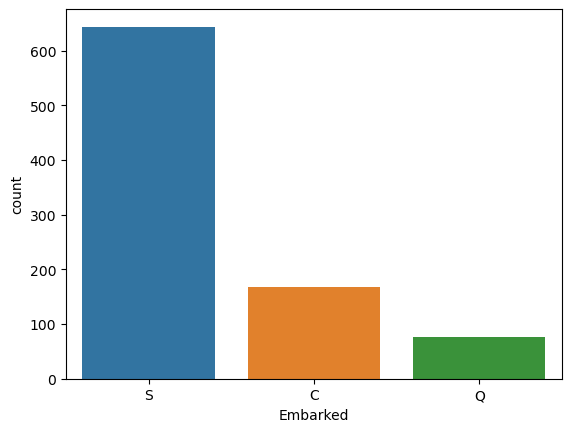

In [17]:
# Countplot of embarked variable
sns.countplot(data=df, x='Embarked');

In [18]:
# Mode embarked to replace missing values 
mode_embarked = df['Embarked'].mode().iloc[0] # Access the first value in the series
df['Embarked'].fillna(mode_embarked, inplace=True)

In [19]:
# Confirm embarked has no missing values
df['Embarked'].isnull().sum()

0

In [20]:
# Describe age feature
df[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [21]:
# Median age to replace missing values 
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

In [22]:
# Confirm age has no missing values
df['Age'].isnull().sum()

0

In [23]:
# Convert age column to integer and round up
df['Age'] = np.ceil(df['Age']).astype(int)
df['Age'].min()

1

The median age was chosen as the replacement for missing age values due to its simplicity and because the missing values appear to be randomly distributed within the dataset.

In [24]:
# Drop irrelevant features for model
# This includes cabin due to high % of missing values and agerange which was earlier defined for target variable analysis
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'AgeRange'])

In [25]:
# Move target feature to the far right
target_column = df.pop('Survived')
df['Survived'] = target_column
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,male,22,1,0,7.2500,S,0
2,1,female,38,1,0,71.2833,C,1
3,3,female,26,0,0,7.9250,S,1
4,1,female,35,1,0,53.1000,S,1
5,3,male,35,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
887,2,male,27,0,0,13.0000,S,0
888,1,female,19,0,0,30.0000,S,1
889,3,female,28,1,2,23.4500,S,0


In [26]:
# Check missing values in selected features
df.isnull().sum().any()

False

In [27]:
# Check info for selected features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [28]:
# Describe selected features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,29.373737,13.019974,1.0,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000


In [29]:
# Datatype of selected features
df.dtypes

Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

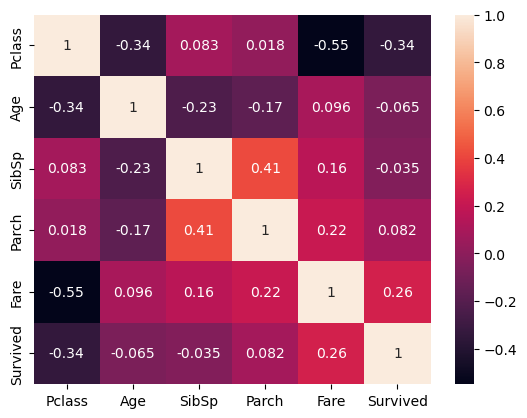

In [30]:
# Heatmap of correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True);

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [31]:
# Define features (X) and target (y)
features_1 = df[['Pclass', 'Parch']]
target = df['Survived']

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [32]:
# ANSWER
# Split dataset into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(features_1, target, test_size=0.2, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [33]:
# ANSWER
# Create Model
logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [34]:
# ANSWER
# Fit Model
logreg.fit(X_train, y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [35]:
# ANSWER
# Coefficients
print(logreg.coef_)

[[-0.90824213  0.33432156]]


The computed intercept (`intercept_`) is the 1st element of another array:

In [36]:
# ANSWER
# Intercept
print(logreg.intercept_)

[1.40820621]


We can create tuples of the predictor names and coefficients like this:

In [37]:
# ANSWER
# Tuples of predictor names and coefficients
print(set(zip(features_1, logreg.coef_[0])))

{('Parch', 0.3343215551477789), ('Pclass', -0.9082421341469833)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [38]:
# Coefficients listed by predictor
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.908242
Parch       +0.334322


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [39]:
# ANSWER
# Make prediction on the training data
y_pred_train = logreg.predict(X_train)

# Calculate accuracy score of training data
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.6924157303370787

What is the  `accuracy_score` for the test data?

In [40]:
# ANSWER
# Make prediction on the test data
y_pred_test = logreg.predict(X_test)

# Calculate accuracy score of test data
accuracy_test_1 = accuracy_score(y_test, y_pred_test)
accuracy_test_1

0.6536312849162011

What can we say about this result?

ANSWER
- When the model predicts outcomes on the training dataset, it correctly predicts around 69.24% of the instances.
- However, when the model is applied to new, unseen data (test dataset), it correctly predicts around 65.36% of the instances.
- In summary, the logistic regression model performs just ok on both the training and test datasets, with slightly lower accuracy on the test dataset, which suggests that the model may generalize reasonably well to new, unseen data.

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [41]:
# ANSWER
# Define features (X) and target (y)
features_2 = df[['Pclass', 'Parch', 'Age']]
target = df['Survived']

In [42]:
# Build Model
logreg = LogisticRegression()

# Split dataset into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(features_2, target, test_size=0.2, random_state=1)

# Fit Model
logreg.fit(X_train, y_train)

# Score
# Make prediction on the test data
y_pred_test = logreg.predict(X_test)

# Calculate accuracy score of test data
accuracy_test_2 = accuracy_score(y_test, y_pred_test)
accuracy_test_2

0.6703910614525139

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER
- From the correlation matrix plotted during the EDA, age is seen to have a weak correlation (-0.065) with survival rate.
- The missing age data, filled with median age value, may have potentially reduced the effect of the age feature in the model.

Let's see where the model is going wrong by showing the Confusion Matrix:

In [43]:
# ANSWER
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test))

[[89 17]
 [42 31]]


Nb. Here is how `confusion_matrix` arranges its output:

In [44]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [45]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
(tn, fp, fn, tp)

(89, 17, 42, 31)

Which type of error is more prevalent?

ANSWER: False Negatives are prevalent which means that that the model is failing to identify positive instances correctly, classifying them as negative.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The Receiver Operating Characteristic (ROC) curve helps us decide (as well as showing us how good our predictive model really is):

In [46]:
# Import metrics module
from sklearn import metrics

In [47]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]
preds

array([0.54409266, 0.19978   , 0.52358971, 0.19978   , 0.71869254,
       0.2396887 , 0.48455523, 0.64795672, 0.69917087, 0.19978   ,
       0.21624381, 0.21064904, 0.49421854, 0.43237724, 0.19978   ,
       0.69917087, 0.43106573, 0.22194539, 0.16053147, 0.65171554,
       0.17931807, 0.21064904, 0.72644445, 0.51527095, 0.27799477,
       0.20516113, 0.83018385, 0.32328312, 0.44880348, 0.73948809,
       0.2336682 , 0.69917087, 0.38260173, 0.21624381, 0.13932475,
       0.47230995, 0.64031777, 0.19978   , 0.71977204, 0.24581457,
       0.20516113, 0.30068277, 0.61427159, 0.56057161, 0.75730163,
       0.1650735 , 0.42291205, 0.34553004, 0.64795672, 0.5318954 ,
       0.43237724, 0.49028232, 0.50694372, 0.36847429, 0.19450548,
       0.22194539, 0.42421725, 0.43624645, 0.38260173, 0.24581457,
       0.29372208, 0.19978   , 0.49574734, 0.56876358, 0.70613353,
       0.28685642, 0.29610538, 0.21064904, 0.43387885, 0.37357667,
       0.22194539, 0.33940286, 0.56057161, 0.19978   , 0.22467

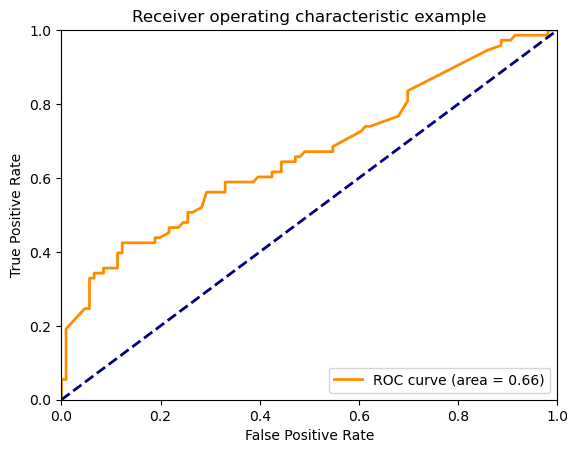

In [48]:
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2 # Line width for the plot

# Plot the ROC curve with labels and styling
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [49]:
# Reload data
df_1 = pd.read_csv('/Users/stephanienduaguba/Documents/DATA/titanic_train.csv', index_col='PassengerId')

# Convert categorical variables into dummy variables
# Note that earlier in the earlier versions of the model in this notebook, Pclass was treated as a numerical variable and is now convered to dummy variables
titanic_with_dummies = pd.get_dummies(data = df_1, columns = ['Sex', 'Embarked', 'Pclass'],
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [50]:
# Groups dataframe and fills missing age value with mean age of each group
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", 
                                      "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", 
                                                            "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [51]:
# Column headers
titanic_with_dummies.columns

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [52]:
# ANSWER
# Set Feature Both Numerical, Categorical
# Define features (X) and target (y)
features_3 = titanic_with_dummies[['Age', 'SibSp', 'Parch', 'Fare', 
                                   'Sex_female', 'Sex_male', 
                                   'Embarked_C', 'Embarked_Q', 'Embarked_S',
                                   'Pclass_1', 'Pclass_2', 'Pclass_3']] # Included all variables except Name, Ticket and Cabin
target = titanic_with_dummies['Survived']

# Split dataset into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(features_3, target, test_size=0.2, random_state=1)

# Create Model
logreg = LogisticRegression(max_iter=1000)

# Fit Model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
# Coefficients listed by predictor
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Age         -0.042808
SibSp       -0.378004
Parch       +0.018189
Fare        +0.001018
Sex_female  +1.300443
Sex_male    -1.292861
Embarked_C  +0.050716
Embarked_Q  +0.090606
Embarked_S  -0.346429
Pclass_1    +1.149184
Pclass_2    +0.159900
Pclass_3    -1.301502


In [54]:
# Make prediction on the test data
y_pred_test = logreg.predict(X_test)

# Calculate accuracy score of test data
accuracy_test_3 = accuracy_score(y_test, y_pred_test)
accuracy_test_3

0.8156424581005587

There is a huge improvement on the performance of the model after conversion of the categorical data into dummy variables.

Plot the ROC curve for the new model:

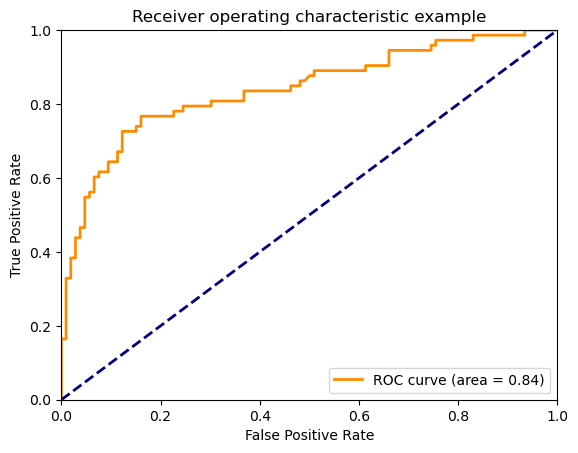

In [55]:
# ANSWER
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2 # Line width for the plot

# Plot the ROC curve with labels and styling
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

ANSWER: The remaining features (Name, Ticket and Cabin) may not significantly improve the performance of the model due to the following reasons:
- Uniqueness: The "Name" column typically contains unique names for each passenger, making it challenging to extract meaningful patterns or insights directly. It would require extensive feature engineering to derive any useful information.
- Cardinality: The "Ticket" column often has a high cardinality with many unique values, which can make it difficult for the model to find meaningful patterns.
- Missing Values: The "Cabin" column has a significant number of missing values (null entries), which could lead to information loss or inconsistencies in the dataset. Imputing these missing values may introduce bias or noise into the model.
- Redundancy: Some information contained in these columns may already be captured by other features such as passenger class (Pclass), which can indirectly represent socio-economic status, or by the prefix in the "Name" (e.g., "Mr." or "Mrs.") which can represent gender and marital status.

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

In [56]:
# 1. ANSWER
# Partition - Partition the data (titanic_with_dummies) into training and testing subsets: No random_state

# Split dataset into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(features_3, target, test_size=0.2)

In [57]:
# Create model
logreg = LogisticRegression(max_iter=1000)

In [58]:
# Fit model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
# Make prediction on the training data
y_pred_train = logreg.predict(X_train)

# Calculate accuracy score of training data
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train

0.8132022471910112

In [60]:
# 2. ANSWER
# Import libraries
from sklearn.model_selection import cross_val_score

# Cross-validation using 5 folds and 'accuracy' scoring metric
scores = cross_val_score(logreg, features_3, target, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.78212291 0.80898876 0.79775281 0.78651685 0.83146067]


In [61]:
# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)

Mean Accuracy: 0.8013684012303057
Standard Deviation: 0.017706749604649272


In [62]:
# 3. ANSWER
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[70 33]
 [43 33]]


In [63]:
# Confusion matrix values
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [64]:
# False Positive Rate and True Positive Rate
FPR = FP / (FP + TN) 
TPR = TP / (TP + FN)

print("FPR =", FPR)
print("TPR =", TPR)

FPR = 0.32038834951456313
TPR = 0.4342105263157895


Summary: The model accurately predicts survival in approximately 43% of cases, with a misclassification rate for survival of 32%.



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



